# 📝 Exercise M6.03

This exercise aims at verifying if **AdaBoost can over-fit**.
We do a **grid-search** and check the **scores** by **varying the
number of estimators**.

We first load the **California housing dataset** and split it into a
training and a testing set.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5)

In [2]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Then, create an **`AdaBoostRegressor`**. Use the function
**`sklearn.model_selection.validation_curve`** to get training and test scores
by **varying** the **number of estimators**. Use the **mean absolute error** as a **metric**
by passing `scoring="neg_mean_absolute_error"`.
*Hint: vary the number of estimators between 1 and 60.*

In [38]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import validation_curve

n_estimators = list(range(1,60))
train_scores, test_scores = validation_curve(AdaBoostRegressor(), 
                                             data_train, 
                                             target_train, 
                                             param_name='n_estimators', 
                                             param_range=n_estimators, 
                                             scoring='neg_mean_absolute_error')

In [39]:
train_errors, test_errors = -train_scores, -test_scores
train_scores.shape, train_scores, test_scores

((59, 5),
 array([[-58.69935163, -58.49885701, -58.45799818, -58.94292778,
         -59.37758161],
        [-58.84639134, -59.25073604, -58.72919883, -57.91738795,
         -59.54784909],
        [-57.5561779 , -58.31055634, -57.77223612, -57.94285174,
         -58.40651027],
        [-56.15557152, -58.31646791, -58.67269619, -58.87092275,
         -57.02344981],
        [-58.042188  , -56.45389134, -58.4363959 , -56.67533305,
         -56.9353553 ],
        [-58.35681541, -56.06380056, -58.91381424, -56.13861359,
         -59.03938982],
        [-58.68498277, -56.62538489, -58.71122242, -57.99565793,
         -56.81534156],
        [-58.09140688, -58.05568071, -60.04574753, -56.56192221,
         -58.19164132],
        [-58.44459351, -60.28316362, -60.02041204, -58.27732329,
         -58.86065009],
        [-58.86941916, -58.55991003, -60.23318855, -58.27077382,
         -58.88582706],
        [-60.16445333, -58.66761938, -59.10261391, -58.5141145 ,
         -58.10934771],
        [-5

Plot both the mean training and test errors. You can also plot the
standard deviation of the errors.
*Hint: you can use `plt.errorbar`.*

<ErrorbarContainer object of 3 artists>

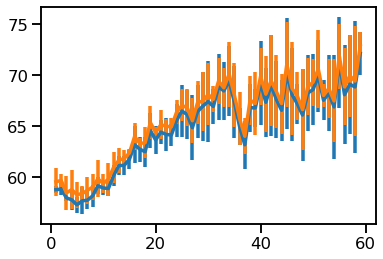

In [40]:
import matplotlib.pyplot as plt

plt.errorbar(n_estimators, train_errors.mean(axis=1), train_errors.std(axis=1))
plt.errorbar(n_estimators, test_errors.mean(axis=1), test_errors.std(axis=1))

Plotting the validation curve, we can see that **AdaBoost** is not immune against
**overfitting**. Indeed, there is an optimal number of estimators to be found.
Adding too many estimators is detrimental for the statistical performance of
the model.

Repeat the experiment using a **random forest** instead of an AdaBoost regressor.

In [41]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = list(range(1,60,3))
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             data_train, 
                                             target_train, 
                                             param_name='n_estimators', 
                                             param_range=n_estimators,
                                             scoring='neg_mean_absolute_error')
train_errors, test_errors = -train_scores, -test_scores
train_scores.shape, train_scores, test_scores

((20, 5),
 array([[-18.70103149, -18.30507643, -19.46585913, -18.61886277,
         -18.96608987],
        [-16.64982576, -16.59592297, -16.75625248, -16.399085  ,
         -16.61322078],
        [-15.51872981, -15.2508275 , -15.74746773, -15.3433238 ,
         -15.96206942],
        [-15.1201308 , -14.76187571, -14.80849973, -14.74914589,
         -15.01898402],
        [-14.58052712, -14.37403882, -14.7189207 , -14.26361961,
         -14.60816932],
        [-14.61746819, -14.06395766, -14.47311317, -14.11278907,
         -14.26499186],
        [-13.82986875, -13.82526228, -14.19122238, -13.89149044,
         -14.0981059 ],
        [-14.22404474, -13.90702081, -14.15705543, -13.80815131,
         -13.88814514],
        [-13.90580937, -13.69379698, -13.93201763, -13.51525732,
         -13.81188879],
        [-13.96062981, -13.45250237, -13.64279008, -13.30417374,
         -13.64043407],
        [-13.74074973, -13.31991694, -13.69152468, -13.52649257,
         -13.56684952],
        [-1

<ErrorbarContainer object of 3 artists>

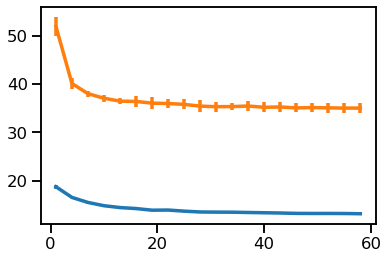

In [42]:
plt.errorbar(n_estimators, train_errors.mean(axis=1), train_errors.std(axis=1))
plt.errorbar(n_estimators, test_errors.mean(axis=1), test_errors.std(axis=1))